In [2]:
from google.colab import files
uploaded = files.upload()

Saving Crude oil.csv to Crude oil.csv


In [88]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.gridspec as gridspec
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import ParameterSampler
from statsmodels.tsa.arima_model import ARIMA

In [5]:
data = pd.read_csv("Crude oil.csv")
data

Date  Price    Volume   Open   High    Low
0     10/28/2022  87.90  241417.0  88.67  88.76  87.08
1     10/27/2022  88.26  273717.0  88.26  89.79  87.33
2     10/26/2022  87.91  271474.0  85.07  88.41  84.14
3     10/25/2022  85.32  226337.0  84.88  86.03  83.06
4     10/24/2022  84.58  238458.0  85.24  85.92  82.63
...          ...    ...       ...    ...    ...    ...
2543  11-05-2012  85.65  185846.0  84.65  85.90  84.34
2544  11-02-2012  84.86  273619.0  86.91  87.24  84.66
2545  11-01-2012  87.09  185097.0  86.10  87.42  85.92
2546  10/31/2012  86.24  192354.0  85.73  87.19  85.61
2547  10/30/2012  85.68       NaN  85.68  85.68  85.68

[2548 rows x 6 columns]

Getting DayName for each Date

In [7]:
# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])
# Extract day names from the 'Date' column
data['DayName'] = data['Date'].dt.strftime('%A')
# Print the DataFrame
print(data)

           Date  Price    Volume   Open   High    Low    DayName
0    2022-10-28  87.90  241417.0  88.67  88.76  87.08     Friday
1    2022-10-27  88.26  273717.0  88.26  89.79  87.33   Thursday
2    2022-10-26  87.91  271474.0  85.07  88.41  84.14  Wednesday
3    2022-10-25  85.32  226337.0  84.88  86.03  83.06    Tuesday
4    2022-10-24  84.58  238458.0  85.24  85.92  82.63     Monday
...         ...    ...       ...    ...    ...    ...        ...
2543 2012-11-05  85.65  185846.0  84.65  85.90  84.34     Monday
2544 2012-11-02  84.86  273619.0  86.91  87.24  84.66     Friday
2545 2012-11-01  87.09  185097.0  86.10  87.42  85.92   Thursday
2546 2012-10-31  86.24  192354.0  85.73  87.19  85.61  Wednesday
2547 2012-10-30  85.68       NaN  85.68  85.68  85.68    Tuesday

[2548 rows x 7 columns]


In [8]:
data.head()

Date  Price    Volume   Open   High    Low    DayName
0 2022-10-28  87.90  241417.0  88.67  88.76  87.08     Friday
1 2022-10-27  88.26  273717.0  88.26  89.79  87.33   Thursday
2 2022-10-26  87.91  271474.0  85.07  88.41  84.14  Wednesday
3 2022-10-25  85.32  226337.0  84.88  86.03  83.06    Tuesday
4 2022-10-24  84.58  238458.0  85.24  85.92  82.63     Monday

In [9]:
data.tail()

Date  Price    Volume   Open   High    Low    DayName
2543 2012-11-05  85.65  185846.0  84.65  85.90  84.34     Monday
2544 2012-11-02  84.86  273619.0  86.91  87.24  84.66     Friday
2545 2012-11-01  87.09  185097.0  86.10  87.42  85.92   Thursday
2546 2012-10-31  86.24  192354.0  85.73  87.19  85.61  Wednesday
2547 2012-10-30  85.68       NaN  85.68  85.68  85.68    Tuesday

In [10]:
data.shape

(2548, 7)

In [11]:
data.describe()

Price        Volume         Open         High          Low
count  2548.000000  2.517000e+03  2548.000000  2548.000000  2548.000000
mean     66.043740  3.954717e+05    66.042500    66.959839    65.065043
std      22.732093  2.345385e+05    22.710749    22.820487    22.565127
min     -37.630000  1.530000e+02   -37.250000   -35.200000   -40.320000
25%      48.620000  2.244770e+05    48.665000    49.317500    47.800000
50%      59.720000  3.638160e+05    59.770000    60.545000    58.850000
75%      87.467500  5.581500e+05    87.450000    88.695000    86.342500
max     123.700000  1.693652e+06   124.580000   129.440000   120.790000

In [12]:
data.columns

Index(['Date', 'Price', 'Volume', 'Open', 'High', 'Low', 'DayName'], dtype='object')

In [13]:
data.nunique()

Date       2548
Price      2103
Volume     2516
Open       2094
High       2080
Low        2096
DayName       5
dtype: int64

In [14]:
data.isnull().sum()

Date        0
Price       0
Volume     31
Open        0
High        0
Low         0
DayName     0
dtype: int64

Filling Null Values With Measures of Central Tendency

In [15]:
data["Volume"].isnull().sum()

31

In [16]:
data["Volume"].fillna(data["Volume"].mean(), inplace=True)
data["Volume"].isnull().sum()

0

In [17]:
data.isnull().sum()

Date       0
Price      0
Volume     0
Open       0
High       0
Low        0
DayName    0
dtype: int64

In [18]:
data.describe()

Price        Volume         Open         High          Low
count  2548.000000  2.548000e+03  2548.000000  2548.000000  2548.000000
mean     66.043740  3.954717e+05    66.042500    66.959839    65.065043
std      22.732093  2.331068e+05    22.710749    22.820487    22.565127
min     -37.630000  1.530000e+02   -37.250000   -35.200000   -40.320000
25%      48.620000  2.255235e+05    48.665000    49.317500    47.800000
50%      59.720000  3.679130e+05    59.770000    60.545000    58.850000
75%      87.467500  5.558335e+05    87.450000    88.695000    86.342500
max     123.700000  1.693652e+06   124.580000   129.440000   120.790000

# Exploratory data Analysis

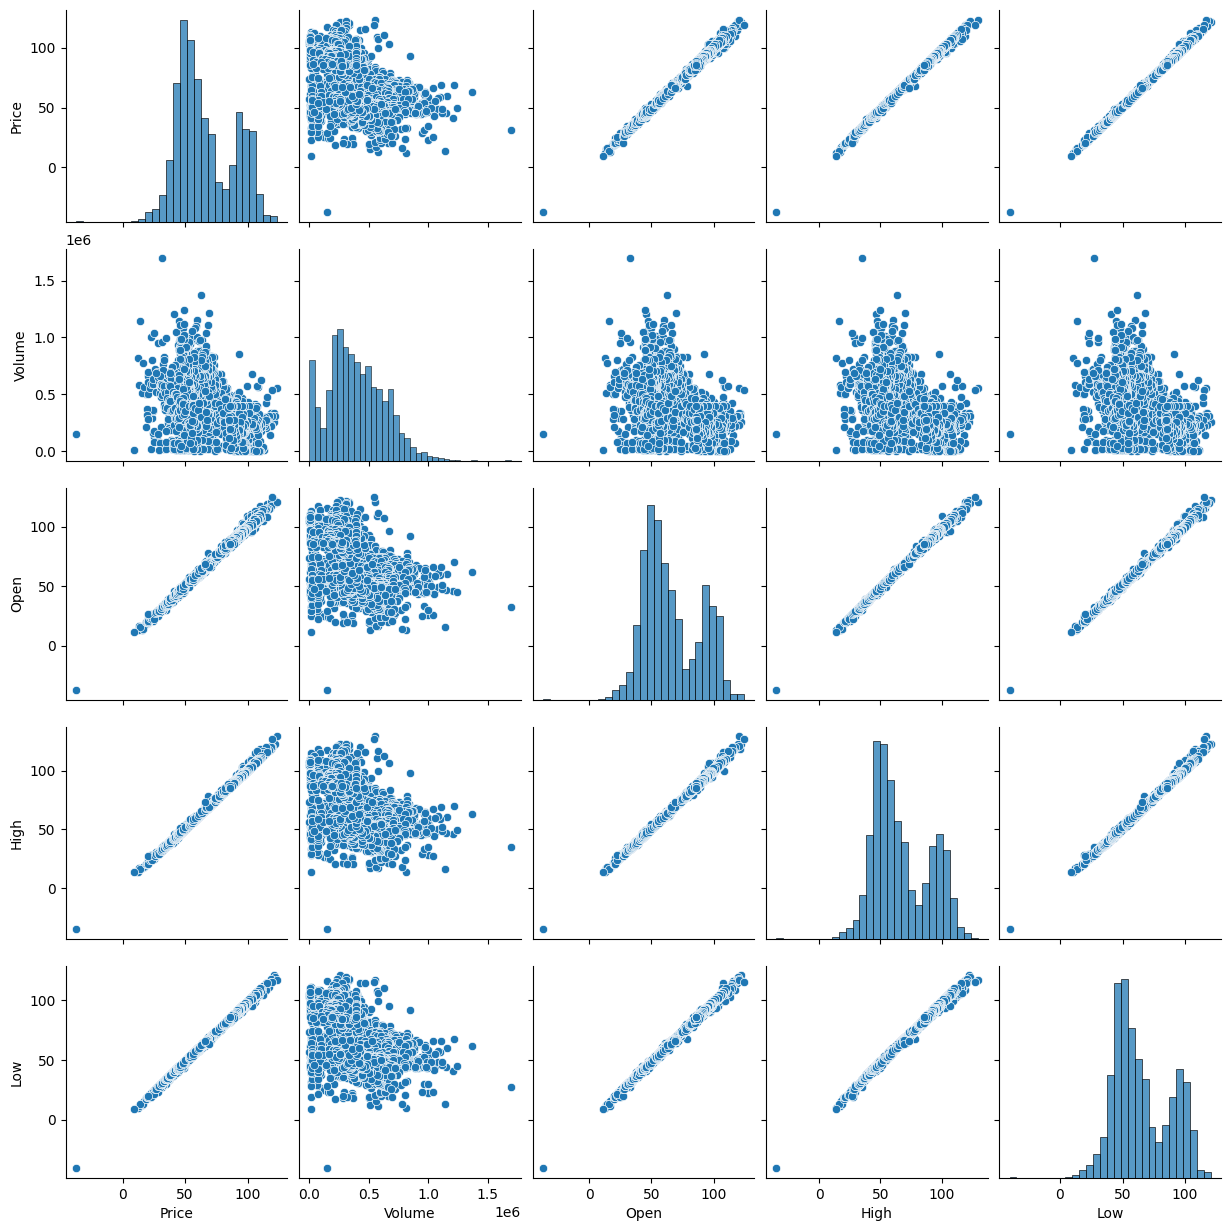

In [19]:
sns.pairplot(data)

# Outliers

Removing Outliers from the data:


We can see some outliers present in the data

Now we try to remove outliers from the data set

In [21]:
# Calculate the interquartile range (IQR) for Close/Last Column
Q1 = data["Price"] .quantile(0.25)
Q3 = data["Price"] .quantile(0.75)
IQR_Close  = Q3 - Q1
limit_Close = 1.5*IQR_Close
print(limit_Close)
# Identify and remove outliers
data["Price"] = data["Price"][~((data["Price"] < (Q1 - limit_Close)) | (data["Price"] > (Q3 + limit_Close)))]
# Calculate the interquartile range (IQR) for Volume column
Q1 = data["Volume"] .quantile(0.25)
Q3 = data["Volume"] .quantile(0.75)
IQR_Volume  = Q3 - Q1
limit_Volume = 1.5*IQR_Volume
print(limit_Volume)
# Identify and remove outliers
data["Volume"] = data["Volume"][~((data["Volume"] < (Q1 - limit_Volume)) | (data["Volume"] > (Q3 + limit_Volume)))]
# Calculate the interquartile range (IQR) for Open column
Q1 = data["Open"] .quantile(0.25)
Q3 = data["Open"] .quantile(0.75)
IQR_Open  = Q3 - Q1
limit_Open = 1.5*IQR_Open
print(limit_Open)
# Identify and remove outliers
data["Open"] = data["Open"][~((data["Open"] < (Q1 - limit_Open)) | (data["Open"] > (Q3 + limit_Open)))]
# Calculate the interquartile range (IQR) for High column
Q1 = data["High"] .quantile(0.25)
Q3 = data["High"] .quantile(0.75)
IQR_High  = Q3 - Q1
limit_High = 1.5*IQR_High
print(limit_High)
# Identify and remove outliers
data["High"] = data["High"][~((data["High"] < (Q1 - limit_High)) | (data["High"] > (Q3 + limit_High)))]
# Calculate the interquartile range (IQR) for Low column
Q1 = data["Low"] .quantile(0.25)
Q3 = data["Low"] .quantile(0.75)
IQR_Low  = Q3 - Q1
limit_Low  = 1.5*IQR_Low
print(limit_Low )
# Identify and remove outliers
data["Low"] = data["Low"][~((data["Low"] < (Q1 - limit_Low)) | (data["Low"] > (Q3 + limit_Low)))]


58.27125000000001
495465.0
58.17750000000001
59.06624999999998
57.813750000000006


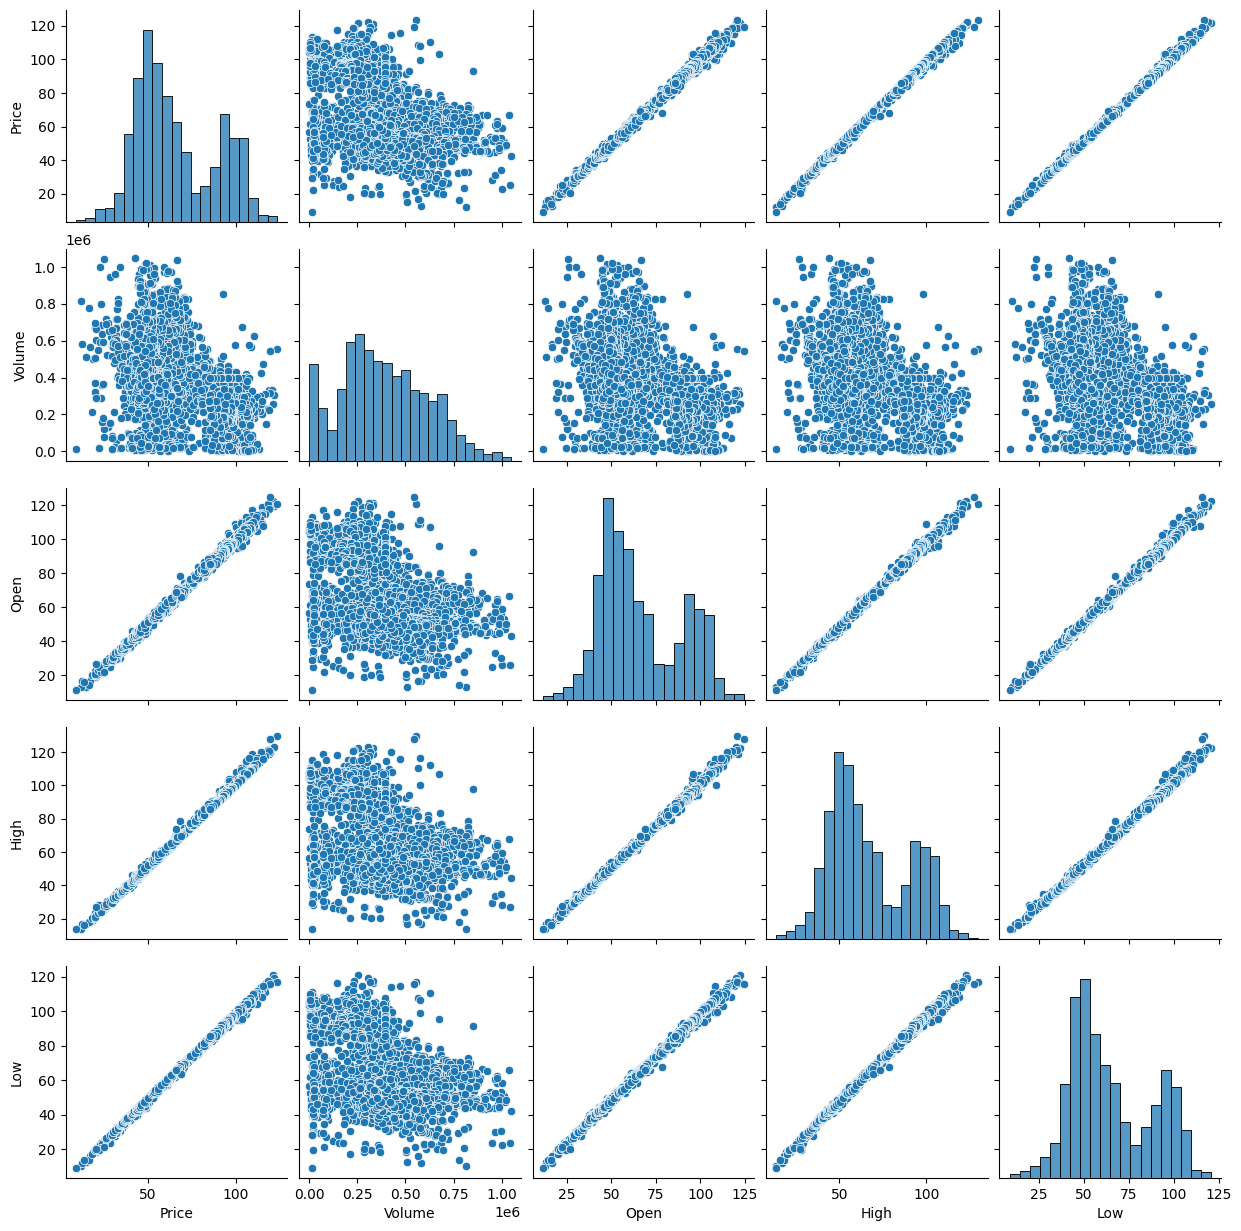

In [22]:
sns.pairplot(data)

In [23]:
data= data.dropna()

In [24]:
data.skew()

Price     0.420500
Volume    0.321591
Open      0.422666
High      0.443381
Low       0.402397
dtype: float64

In [25]:
data.kurt()

Price    -0.899999
Volume   -0.498205
Open     -0.902766
High     -0.894271
Low      -0.906081
dtype: float64

In [26]:
correlation = data.corr()
correlation

Price    Volume      Open      High       Low
Price   1.000000 -0.412386  0.998202  0.999074  0.999214
Volume -0.412386  1.000000 -0.410005 -0.406904 -0.414542
Open    0.998202 -0.410005  1.000000  0.999022  0.998816
High    0.999074 -0.406904  0.999022  1.000000  0.998516
Low     0.999214 -0.414542  0.998816  0.998516  1.000000

<Axes: >

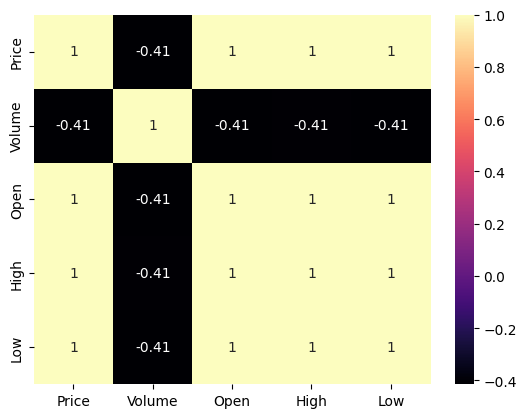

In [27]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='magma')

# Distribution Plot

Distribution Plot For each Variable

<Axes: xlabel='Price', ylabel='Density'>

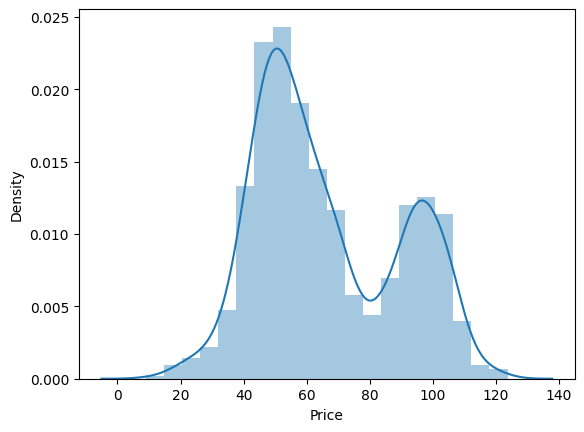

In [28]:
sns.distplot(data["Price"])

<Axes: xlabel='Volume', ylabel='Density'>

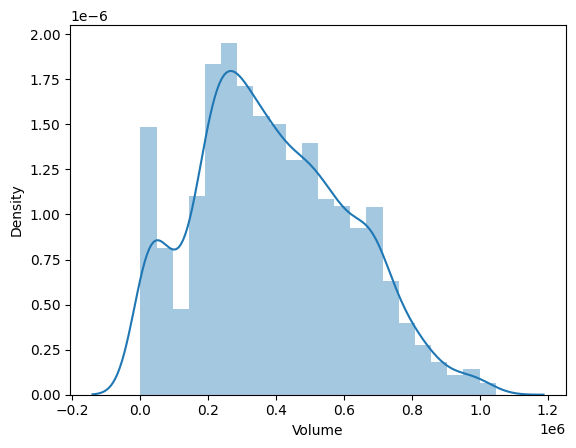

In [29]:
sns.distplot(data["Volume"])

<Axes: xlabel='Open', ylabel='Density'>

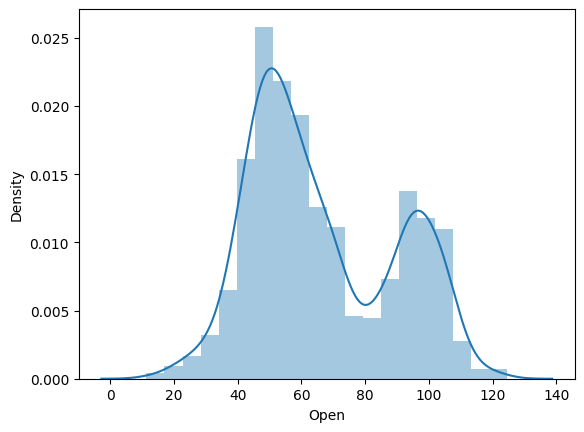

In [30]:
sns.distplot(data["Open"])

<Axes: xlabel='High', ylabel='Density'>

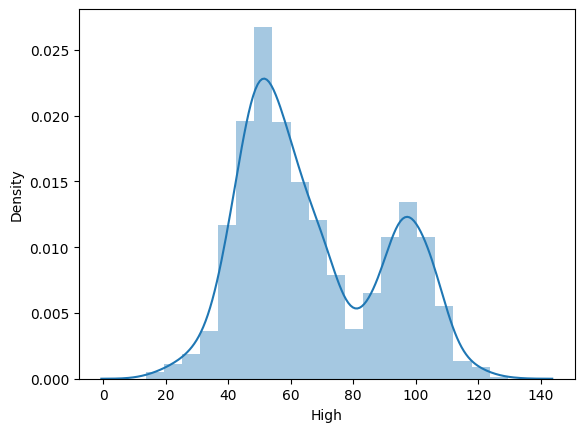

In [31]:
sns.distplot(data["High"])

<Axes: xlabel='Low', ylabel='Density'>

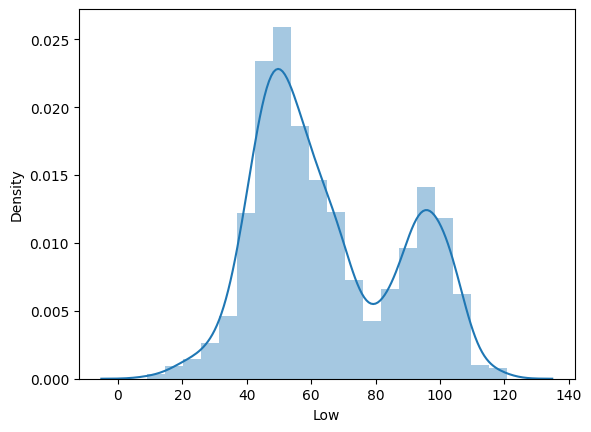

In [32]:
sns.distplot(data["Low"])

# Categorical Plot

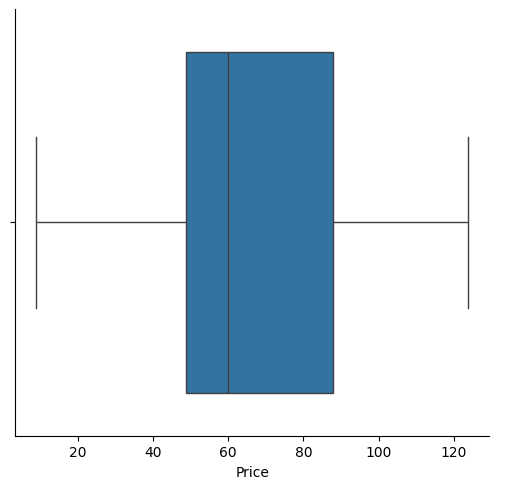

In [34]:
sns.catplot(x="Price",kind= "box",data= data)

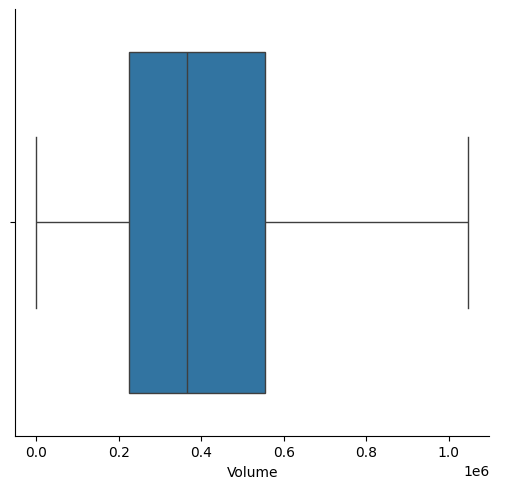

In [35]:
sns.catplot(x="Volume",kind= "box",data= data)

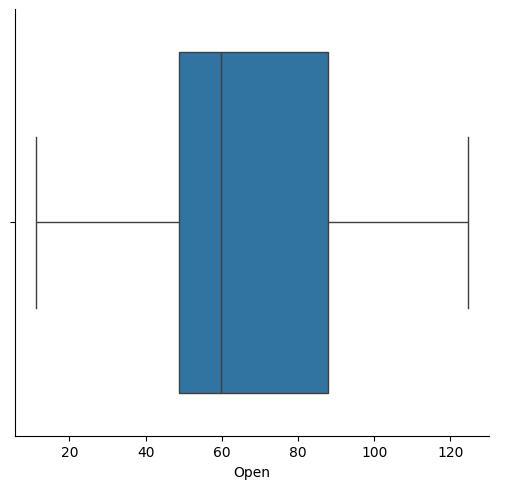

In [36]:
sns.catplot(x="Open",kind= "box",data= data)

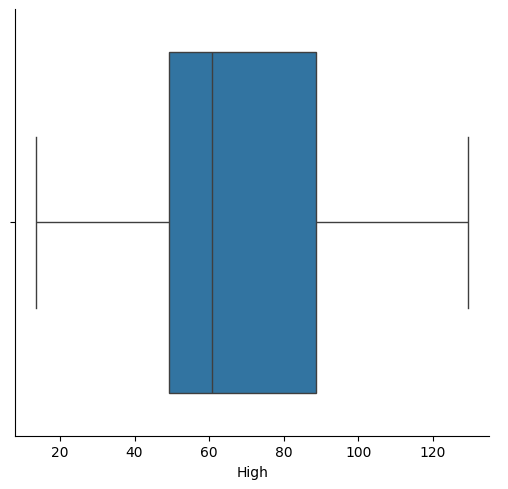

In [37]:
sns.catplot(x="High",kind= "box",data= data)

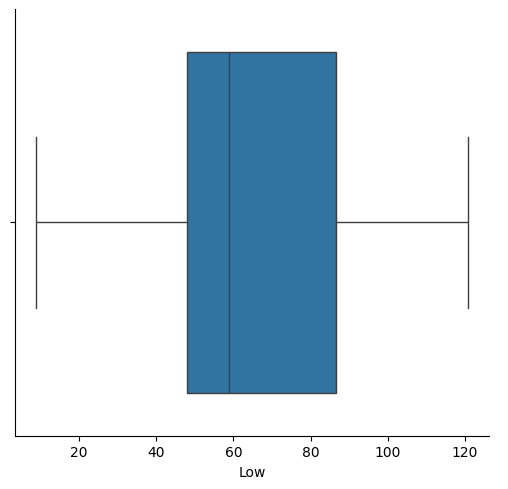

In [38]:
sns.catplot(x="Low",kind= "box",data= data)

# Trend in the data

To understand trend in data we are going to us plotly

In [39]:
import plotly.express as px

data_plot = data[['Date','Price']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="Price", title='Total Price by Date')
fig.show()

In [40]:
import plotly.express as px

data_plot = data[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="Volume", title='Total Price by Date')
fig.show()

In [41]:
import plotly.express as px

data_plot = data[['Date','Open']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="Open", title='Total Price by Date')
fig.show()

In [42]:
import plotly.express as px

data_plot = data[['Date','High']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="High", title='Total Price by Date')
fig.show()

In [43]:
import plotly.express as px

data_plot = data[['Date','Low']].groupby(['Date']).sum().reset_index()
fig = px.line(data_plot, x="Date", y="Low", title='Total Price by Date')
fig.show()

**Trend in single year**

In [44]:
SINGLE_YEAR = 2020

df_sales_single_year = data[data['Date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.bar(df_plot, x='Date', y='Volume',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [45]:
SINGLE_YEAR = 2021

df_sales_single_year = data[data['Date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.bar(df_plot, x='Date', y='Volume',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [46]:
SINGLE_YEAR = 2012

df_sales_single_year = data[data['Date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.bar(df_plot, x='Date', y='Volume',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [47]:
SINGLE_YEAR = 2013

df_sales_single_year = data[data['Date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['Date','Volume']].groupby(['Date']).sum().reset_index()
fig = px.bar(df_plot, x='Date', y='Volume',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

#Histogram

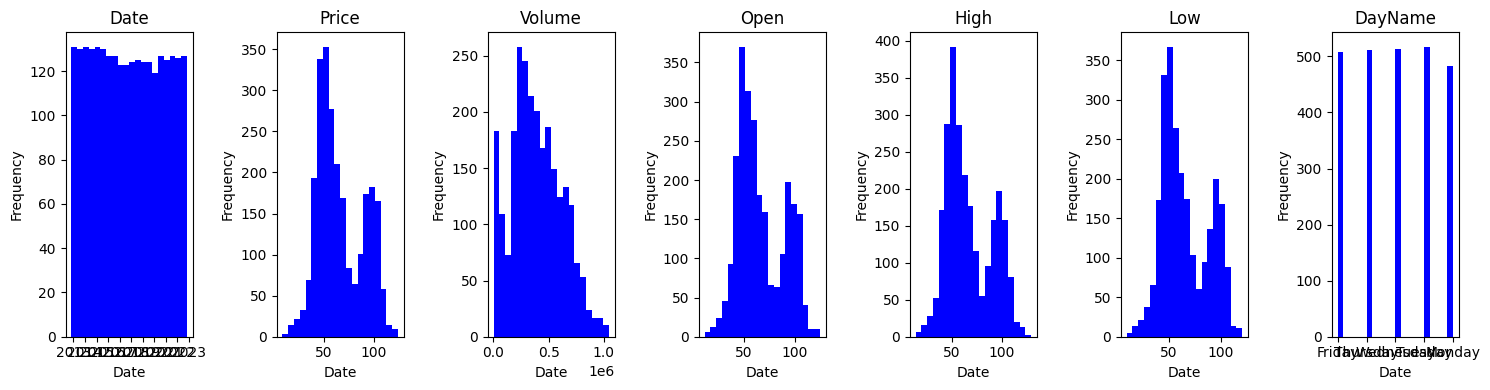

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 4))
# Plot histograms for each column
for i, column in enumerate(data.columns):
    axes[i].hist(data[column], bins=20, color='blue', alpha=1)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

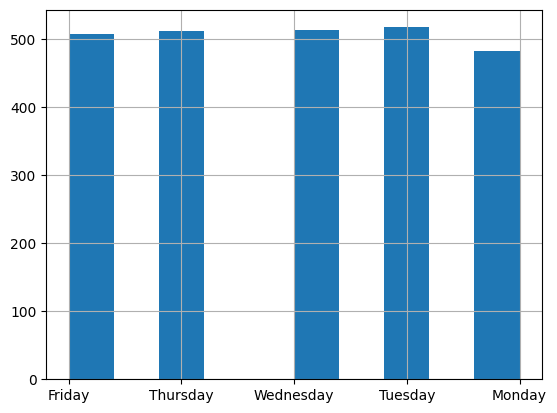

In [50]:
data["DayName"].hist()

# Seasonal Trend

<Figure size 640x480 with 0 Axes>

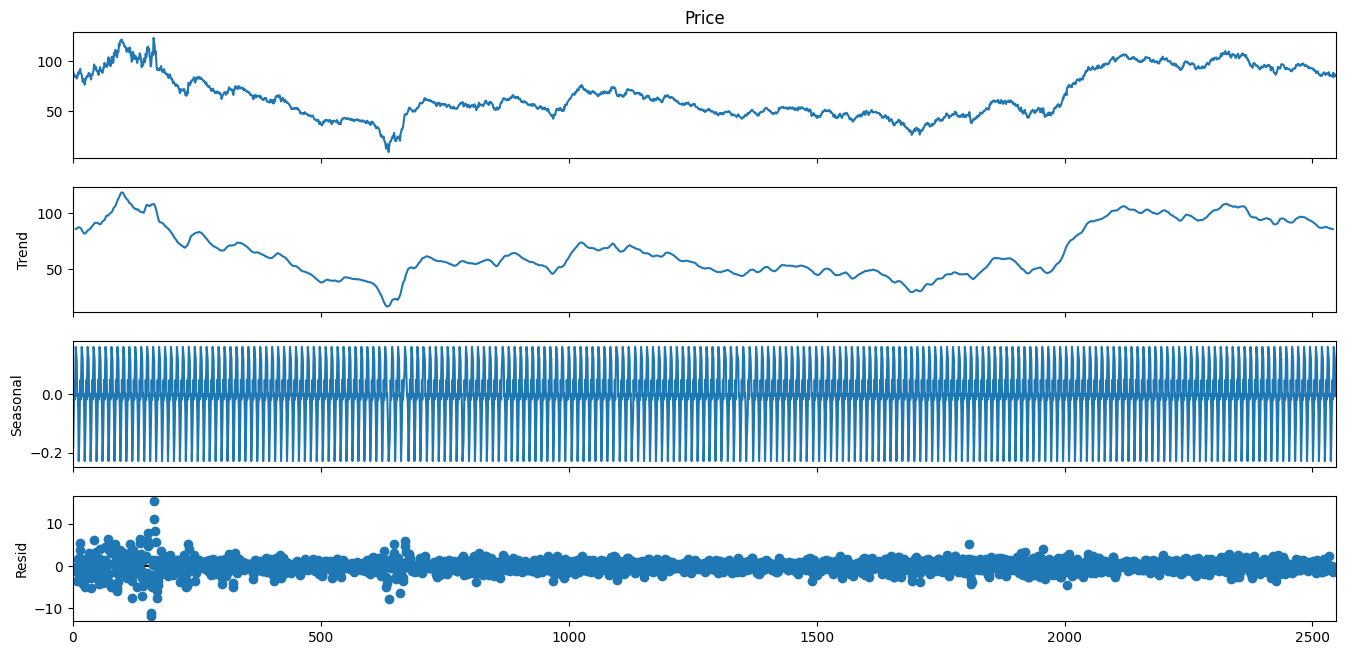

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Price"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<Figure size 640x480 with 0 Axes>

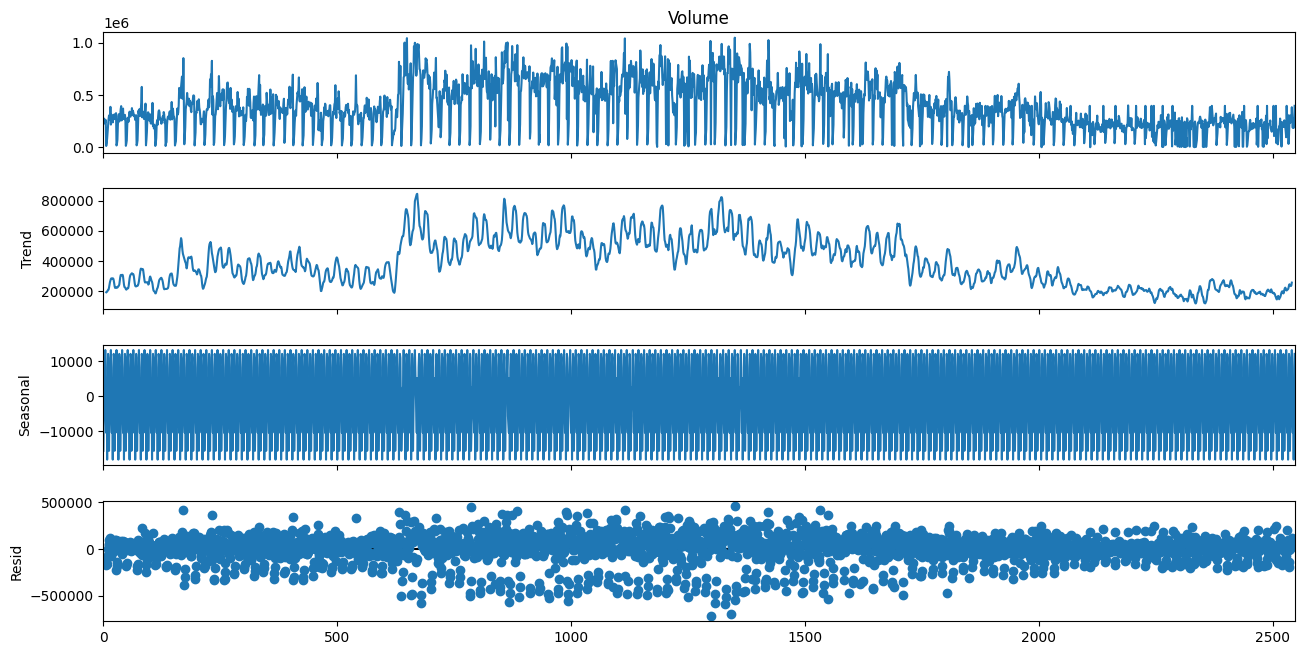

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Volume"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<Figure size 640x480 with 0 Axes>

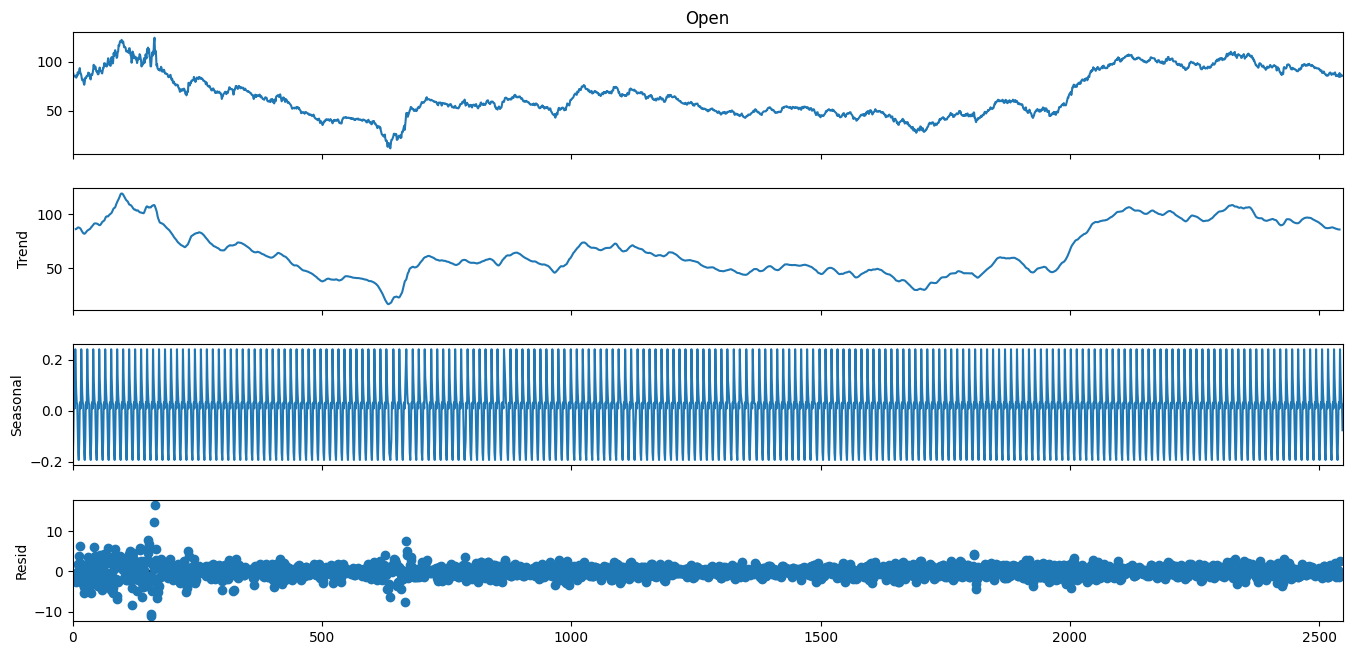

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Open"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<Figure size 640x480 with 0 Axes>

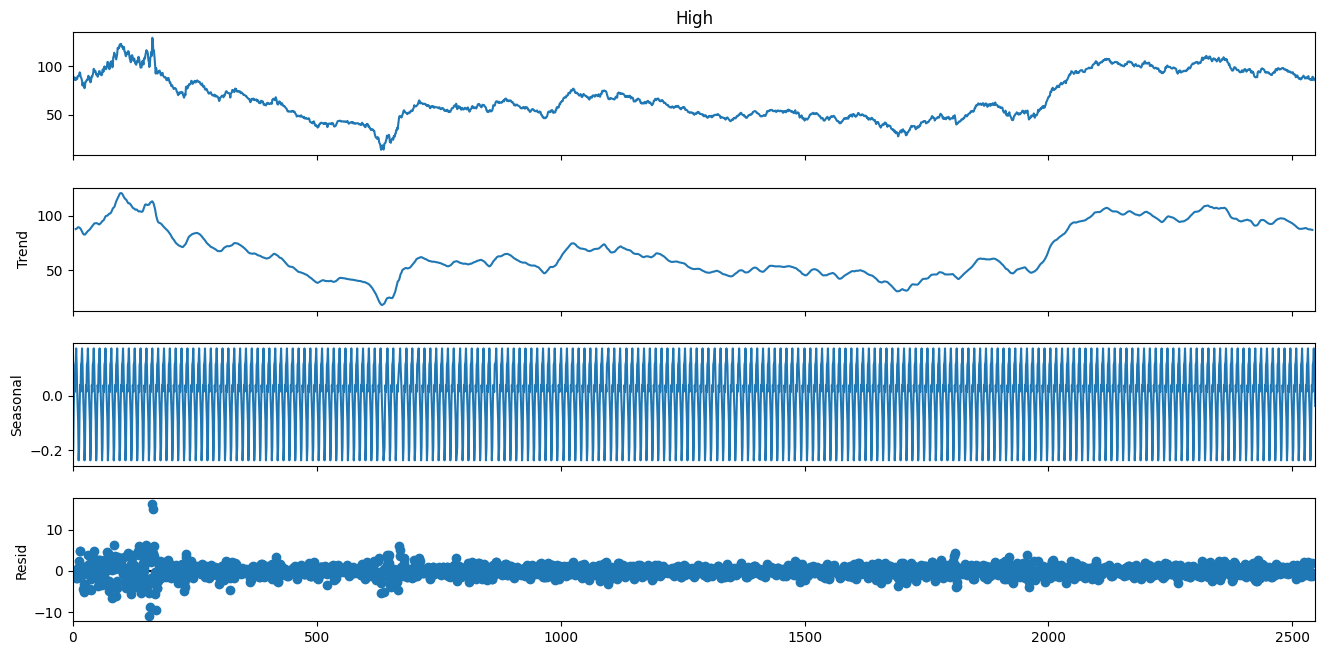

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["High"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


<Figure size 640x480 with 0 Axes>

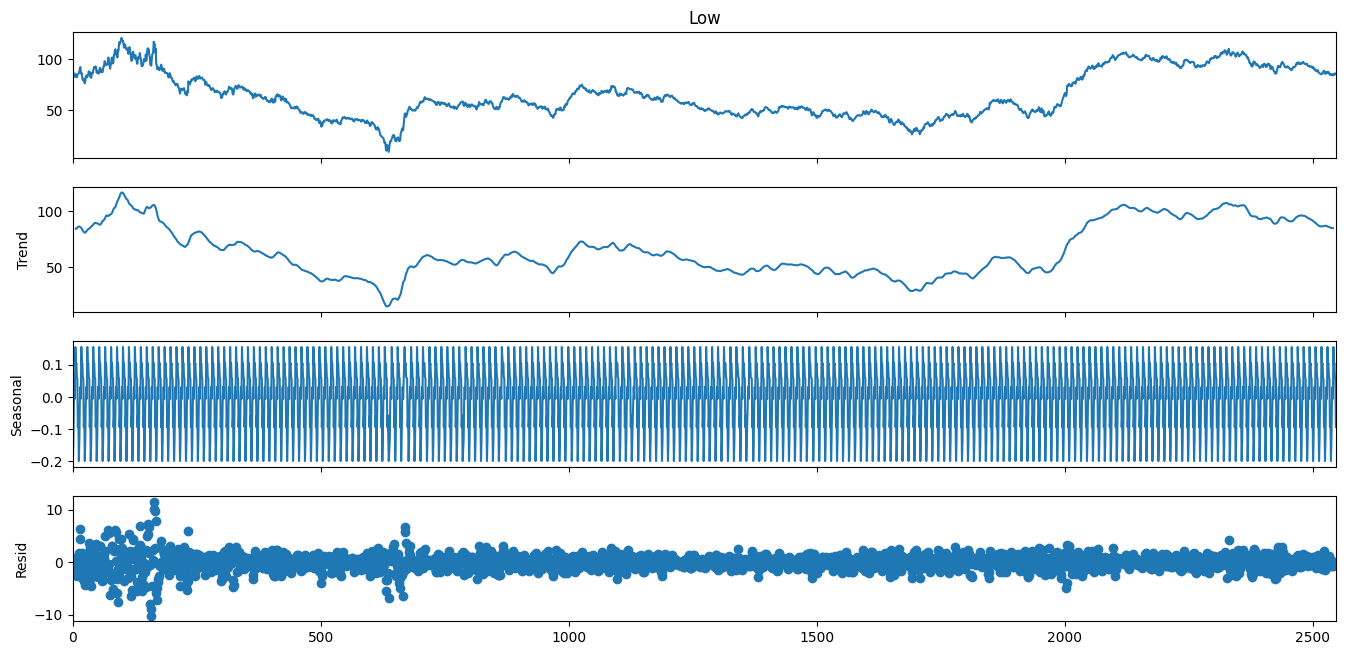

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Low"], model='additive', period=12)  # Seasonal Decomposition of Time Series
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 7)
plt.show()


# Rolling Mean

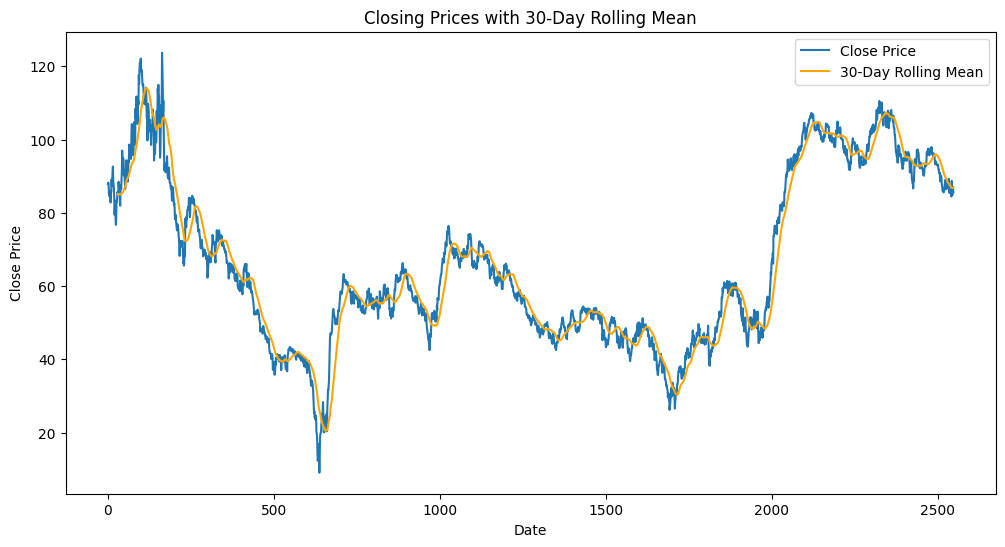

In [57]:
# Rolling average for closing prices
data['Rolling Mean'] = data['Price'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Close Price')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Closing Prices with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

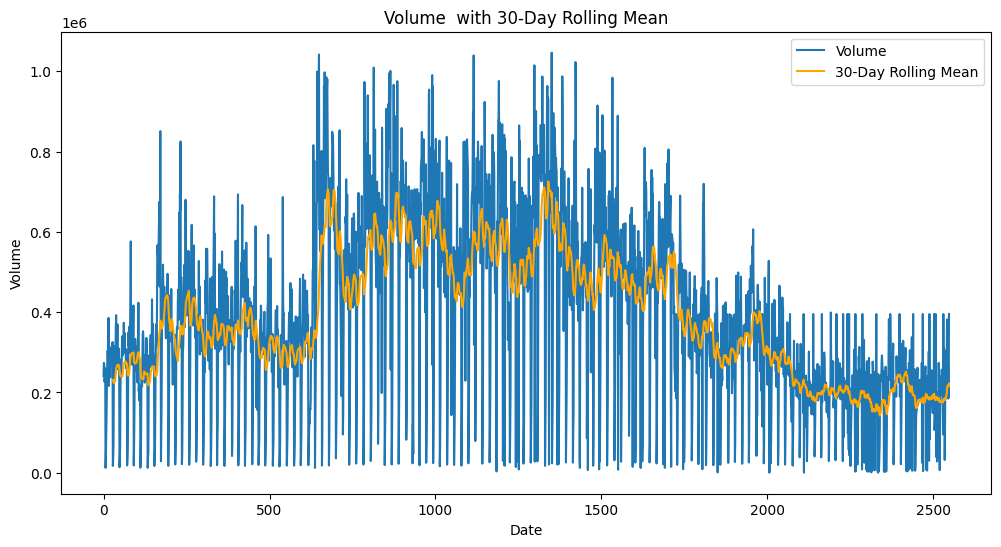

In [58]:
# Rolling average for closing prices
data['Rolling Mean'] = data['Volume'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], label='Volume')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Volume  with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

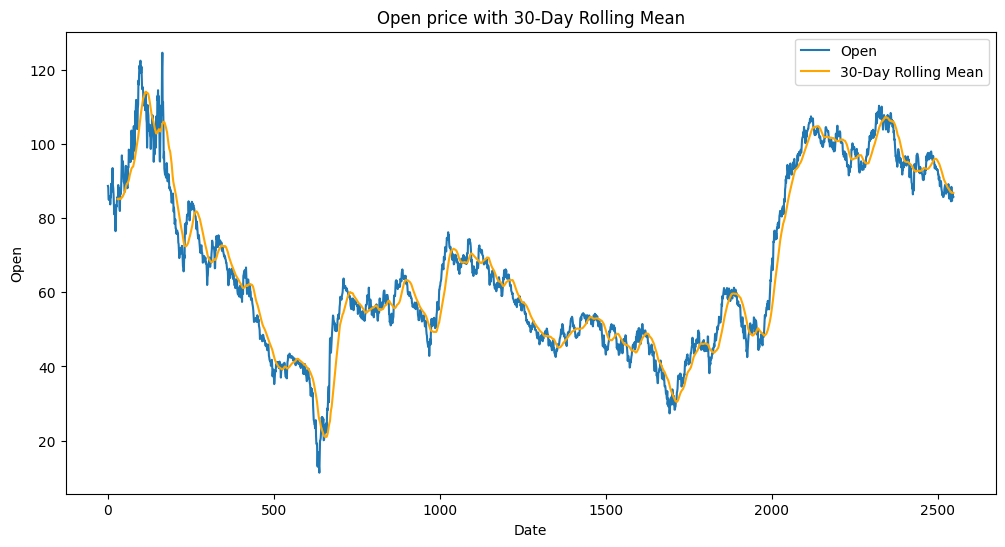

In [59]:
# Rolling average for closing prices
data['Rolling Mean'] = data['Open'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Open'], label='Open')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Open price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.show()

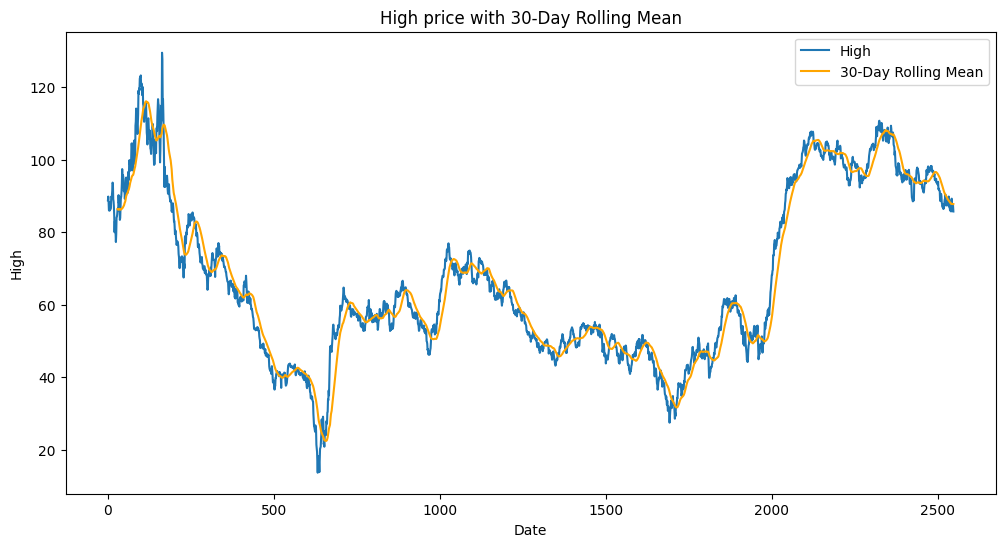

In [60]:
# Rolling average for closing prices
data['Rolling Mean'] = data['High'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['High'], label='High')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('High price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.show()

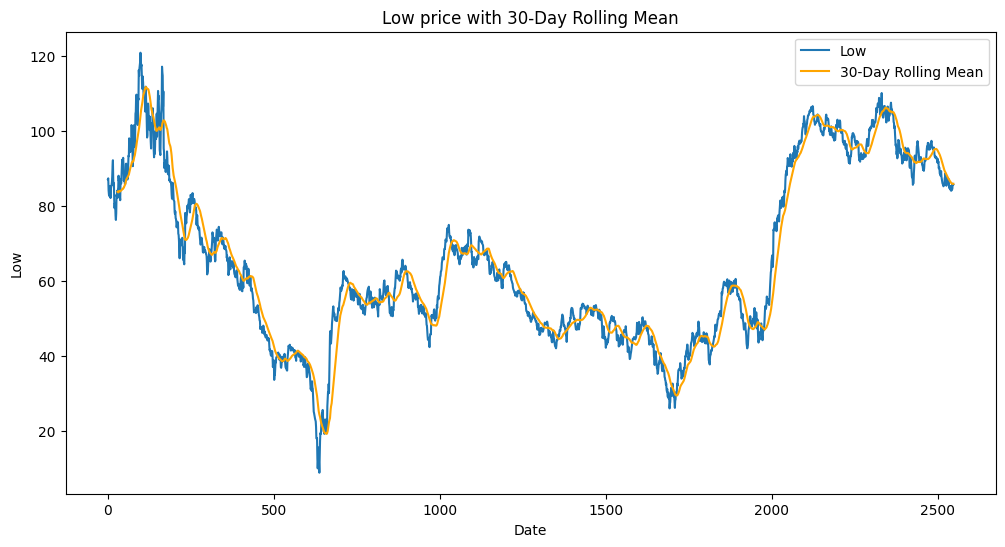

In [61]:
# Rolling average for closing prices
data['Rolling Mean'] = data['Low'].rolling(window=30).mean()

# Visualizing rolling average
plt.figure(figsize=(12, 6))
plt.plot(data['Low'], label='Low')
plt.plot(data['Rolling Mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Low price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Low')
plt.legend()
plt.show()

# Stationarity of the data using Differencing,  Log Transformation, Seasonal Differencing

In [62]:
# making the data Stationary
# Method 1: Differencing
data['Price_Diff'] = data['Price'] - data['Price'].shift(5)
data['Price_Diff'].dropna(inplace=True)

In [63]:
# Method 2: Log Transformation
data['Price_Log'] = np.log(data['Price'])
data['Price_Log_Diff'] = data['Price_Log'] - data['Price_Log'].shift(5)
data['Price_Log_Diff'].dropna(inplace=True)

In [64]:
# Method 3: Seasonal Differencing (if seasonality is present)
data['Price_Seasonal_Diff'] = data['Price'] - data['Price'].shift(20)  # Assuming a seasonality of 30 days
data['Price_Seasonal_Diff'].dropna(inplace=True)


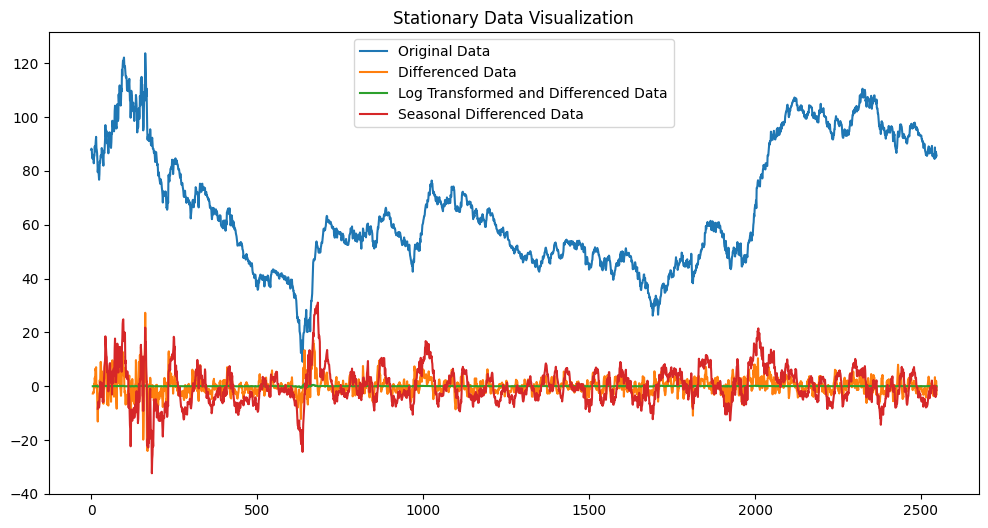

In [65]:
# Plot the original and differenced data for visualization
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Original Data')
plt.plot(data['Price_Diff'], label='Differenced Data')
plt.plot(data['Price_Log_Diff'], label='Log Transformed and Differenced Data')
plt.plot(data['Price_Seasonal_Diff'], label='Seasonal Differenced Data')
plt.legend()
plt.title('Stationary Data Visualization')
plt.show()

In [66]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()

Date                   0
Price                  0
Volume                 0
Open                   0
High                   0
Low                    0
DayName                0
Rolling Mean           0
Price_Diff             0
Price_Log              0
Price_Log_Diff         0
Price_Seasonal_Diff    0
dtype: int64

# Stationarity

Checking the stationarity of data using Dickey-Fuller Test with the help of p-value

If p-value <= 0.05 then the data is Stationary

In [67]:
from statsmodels.tsa.stattools import adfuller
# ADF test for differenced data
result_diff = adfuller(data['Price_Diff'])
# ADF test for log-transformed and differenced data
result_log_diff = adfuller(data['Price_Log_Diff'])
# ADF test for seasonal differenced data
result_seasonal_diff = adfuller(data['Price_Seasonal_Diff'])
# Print the p-values and determine stationarity
print(f'ADF Test for Differenced Data - p-value: {result_diff[1]}')
print(f'ADF Test for Log-Transformed and Differenced Data - p-value: {result_log_diff[1]}')
print(f'ADF Test for Seasonal Differenced Data - p-value: {result_seasonal_diff[1]}')

ADF Test for Differenced Data - p-value: 2.6377035340337603e-11
ADF Test for Log-Transformed and Differenced Data - p-value: 1.6657507776128016e-11
ADF Test for Seasonal Differenced Data - p-value: 1.222772745437538e-07


Since p-value is less than 0.05 we can say that the data is transformed into stationary form

# Model Fitting

Based on Metrics like RMSE And R_Square it is drawn that the quarterly seasonal Arima oios the best fit for the given data

In [69]:
df = pd.read_csv('Crude oil.csv')

In [70]:
# Drop specified columns
columns_to_drop = ['Volume', 'Open', 'Low', 'High']
df = df.drop(columns=columns_to_drop)
# Display the DataFrame after dropping columns
print(df)

            Date  Price
0     10/28/2022  87.90
1     10/27/2022  88.26
2     10/26/2022  87.91
3     10/25/2022  85.32
4     10/24/2022  84.58
...          ...    ...
2543  11-05-2012  85.65
2544  11-02-2012  84.86
2545  11-01-2012  87.09
2546  10/31/2012  86.24
2547  10/30/2012  85.68

[2548 rows x 2 columns]


In [71]:
null_values_total = df.isnull().sum()
print(null_values_total)

Date     0
Price    0
dtype: int64


In [72]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display the DataFrame with the 'Date' column as datetime
print(df)

           Date  Price
0    2022-10-28  87.90
1    2022-10-27  88.26
2    2022-10-26  87.91
3    2022-10-25  85.32
4    2022-10-24  84.58
...         ...    ...
2543 2012-11-05  85.65
2544 2012-11-02  84.86
2545 2012-11-01  87.09
2546 2012-10-31  86.24
2547 2012-10-30  85.68

[2548 rows x 2 columns]


# Spliting the data

In [73]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# ARIMA Model Building

In [75]:
# ARIMA Model
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [77]:
order = (1, 1, 0)
seasonal_order = (1, 1, 1, 4)
model = SARIMAX(train['Price'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

In [78]:
start_date = test.index[0]
end_date = test.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date, dynamic=False)
rmse_Arima = sqrt(mean_squared_error(test['Price'], predictions))
print(f'RMSE: {rmse_Arima}')

RMSE: 11.410134619035919


In [79]:
forecast = model_fit.forecast(steps=len(test))
forecast

2038     81.822956
2039     81.913174
2040     81.937121
2041     82.046597
2042     82.018010
           ...    
2543    106.568580
2544    106.590552
2545    106.700107
2546    106.671502
2547    106.764243
Name: predicted_mean, Length: 510, dtype: float64

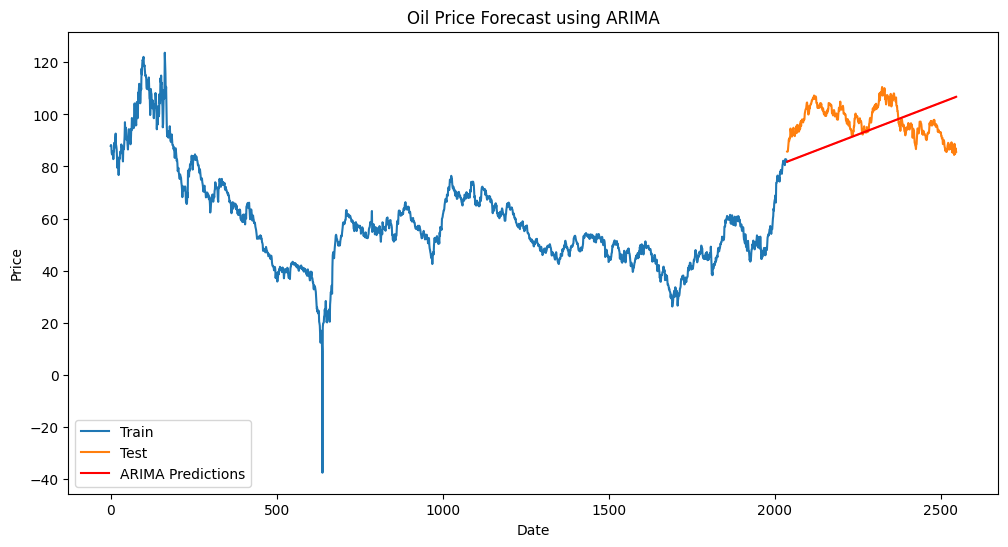

In [81]:
import matplotlib.pyplot as plt
# Plotting ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index, test['Price'], label='Test')
plt.plot(test.index, forecast, label='ARIMA Predictions', color='red')  # Use the forecast values from ARIMA
plt.title('Oil Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [82]:
df = pd.read_csv("Crude oil.csv")
df

Date  Price    Volume   Open   High    Low
0     10/28/2022  87.90  241417.0  88.67  88.76  87.08
1     10/27/2022  88.26  273717.0  88.26  89.79  87.33
2     10/26/2022  87.91  271474.0  85.07  88.41  84.14
3     10/25/2022  85.32  226337.0  84.88  86.03  83.06
4     10/24/2022  84.58  238458.0  85.24  85.92  82.63
...          ...    ...       ...    ...    ...    ...
2543  11-05-2012  85.65  185846.0  84.65  85.90  84.34
2544  11-02-2012  84.86  273619.0  86.91  87.24  84.66
2545  11-01-2012  87.09  185097.0  86.10  87.42  85.92
2546  10/31/2012  86.24  192354.0  85.73  87.19  85.61
2547  10/30/2012  85.68       NaN  85.68  85.68  85.68

[2548 rows x 6 columns]

In [83]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Ensure 'Close/Last' column has a numeric data type
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [89]:
# Define a range of hyperparameters to test
param_dist = {
    "order": [(p, d, q) for p in range(3) for d in [0, 1, 2] for q in range(3)],
    "seasonal_order": [(P, D, Q, 12) for P in range(3) for D in [0, 1, 2] for Q in range(3)]
}
# Initialize a random parameter sampler
param_list = list(ParameterSampler(param_dist, n_iter=50))
# Define Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

In [90]:
best_aic = np.inf
best_bic = np.inf
best_params = None

In [91]:
# Cross-validation and hyperparameter tuning
for params in param_list:
    aic_scores = []
    bic_scores = []

In [92]:
# Cross-validation loop
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
# Fit SARIMAX model
sarima = SARIMAX(cv_train['Price'], order=params['order'], seasonal_order=params['seasonal_order'])
sarima_results = sarima.fit()

# Collect AIC and BIC scores
aic_scores.append(sarima_results.aic)
bic_scores.append(sarima_results.bic)

In [93]:
# Calculate mean AIC and BIC scores
mean_aic = np.mean(aic_scores)
mean_bic = np.mean(bic_scores)
# Update best parameters if the current model is better
if mean_aic < best_aic and mean_bic < best_bic:
    best_aic = mean_aic
    best_bic = mean_bic
    best_params = params

In [94]:
# Output the best parameters
print("Best parameters:", best_params)
print("Best AIC:", best_aic)
print("Best BIC:", best_bic)

Best parameters: {'seasonal_order': (2, 1, 0, 12), 'order': (0, 0, 0)}
Best AIC: 13107.531024921027
Best BIC: 13124.497196855506


# SARIMAX

In [95]:
# Fit the best model
best_model = SARIMAX(df['Price'], order=best_params['order'], seasonal_order=best_params['seasonal_order'])
best_model_fit = best_model.fit()

In [96]:
# Extract prediction mean
mean = best_model_fit.get_forecast(steps=len(df['Price'])).predicted_mean

In [97]:
# Confidence intervals for the out-of-sample data
conf_int = best_model_fit.get_forecast(steps=len(df['Price'])).conf_int()

In [98]:
# Correct any negative lower confidence levels in the out-of-sample data
conf_int[conf_int.iloc[:, 0] < 0] = 0

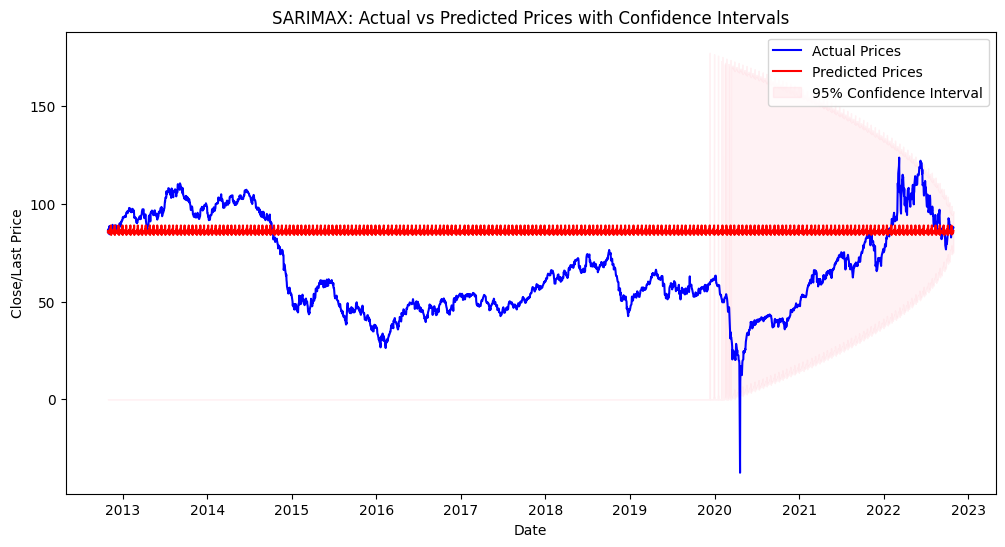

In [99]:
import matplotlib.pyplot as plt

# Plotting the actual data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Actual Prices', color='blue')
# Plotting the predicted mean
plt.plot(df.index, mean, label='Predicted Prices', color='red')
# Plotting the confidence intervals
plt.fill_between(df.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2, label='95% Confidence Interval')
# Adding labels and title
plt.title('SARIMAX: Actual vs Predicted Prices with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.legend()
plt.show()

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
df = pd.read_csv('Crude oil.csv')
# Drop specified columns
columns_to_drop = ['Volume', 'Open', 'Low', 'High']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df)

            Date  Price
0     10/28/2022  87.90
1     10/27/2022  88.26
2     10/26/2022  87.91
3     10/25/2022  85.32
4     10/24/2022  84.58
...          ...    ...
2543  11-05-2012  85.65
2544  11-02-2012  84.86
2545  11-01-2012  87.09
2546  10/31/2012  86.24
2547  10/30/2012  85.68

[2548 rows x 2 columns]


In [101]:
null_values_total = df.isnull().sum()
print(null_values_total)

Date     0
Price    0
dtype: int64


In [102]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

# **Seasonal Arima Model**

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [105]:
order = (1, 1, 0)  # Replace with appropriate order values
seasonal_order = (1, 1, 0,12)  # Replace with appropriate seasonal_order values
model = SARIMAX(train['Price'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

In [106]:
start_date = test.index[0]
end_date = test.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date, dynamic=False)

In [108]:
rmse_Sarima_12 = sqrt(mean_squared_error(test['Price'], predictions))
print(f'RMSE: {rmse_Sarima_12}')

RMSE: 47.08937569258061


In [109]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close/Last'], label='Train')
plt.plot(test.index, test['Close/Last'], label='Test')
plt.plot(test.index, predictions, label='SARIMA Predictions')
plt.title('Oil Price Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.legend()
plt.show()

KeyError: 'Close/Last'

<Figure size 1200x600 with 0 Axes>

# **Arima Model**

In [110]:
# ARIMA Model
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [111]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    Train_size = int(len(X) * 0.50)
    Train, Test = X[0:Train_size], X[Train_size:]
    history = [x for x in Train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse_Arima = sqrt(mean_squared_error(test, predictions))
    return rmse_Arima

In [114]:
rmse_Arima

11.410134619035919

In [115]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [116]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [117]:
forecast = model_fit.forecast(steps=len(test))
forecast

2038     82.661590
2039     81.447599
2040     82.649063
2041     83.013694
2042     83.323650
           ...    
2543    180.797043
2544    181.475868
2545    181.726192
2546    182.284353
2547    181.623235
Name: predicted_mean, Length: 510, dtype: float64

In [118]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

In [120]:
order = (1, 1, 0)
seasonal_order = (1, 1, 1, 4)
model = SARIMAX(train['Price'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

In [121]:
start_date = test.index[0]
end_date = test.index[-1]
predictions = model_fit.predict(start=start_date, end=end_date, dynamic=False)

In [123]:
rmse_Arima = sqrt(mean_squared_error(test['Price'], predictions))
print(f'RMSE: {rmse_Arima}')

RMSE: 11.410134619035919


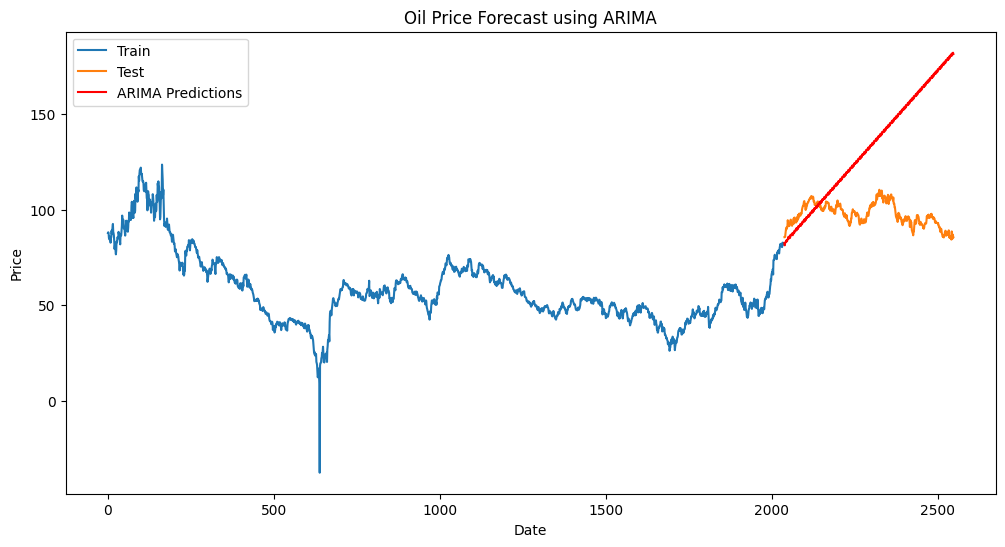

In [125]:
import matplotlib.pyplot as plt
# Plotting ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index, test['Price'], label='Test')
plt.plot(test.index, forecast, label='ARIMA Predictions', color='red')  # Use the forecast values from ARIMA
plt.title('Oil Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# **LST Model**

In [126]:
# LSTM Model

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [128]:
data = df['Price'].values.reshape(-1, 1)

In [129]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [130]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [131]:
# Function to create time series dataset
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

In [132]:
# Create time series dataset with a time window (time_steps)
time_steps = 30
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [133]:
# Reshape the input data for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [134]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [135]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
63/63 [==============================] - 6s 36ms/step - loss: 0.0217
Epoch 2/10
63/63 [==============================] - 2s 31ms/step - loss: 0.0011
Epoch 3/10
63/63 [==============================] - 2s 25ms/step - loss: 6.6681e-04
Epoch 4/10
63/63 [==============================] - 2s 26ms/step - loss: 5.9367e-04
Epoch 5/10
63/63 [==============================] - 2s 25ms/step - loss: 5.6924e-04
Epoch 6/10
63/63 [==============================] - 2s 25ms/step - loss: 5.5694e-04
Epoch 7/10
63/63 [==============================] - 2s 25ms/step - loss: 5.3790e-04
Epoch 8/10
63/63 [==============================] - 2s 33ms/step - loss: 5.0822e-04
Epoch 9/10
63/63 [==============================] - 2s 34ms/step - loss: 5.0427e-04
Epoch 10/10
63/63 [==============================] - 2s 26ms/step - loss: 5.2555e-04


In [136]:
# Generate predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

15/15 [==============================] - 0s 9ms/step


In [137]:
# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [138]:
# Evaluate the model
rmse_LSTM = np.sqrt(np.mean(np.square(train_predict - y_train)))
rmse_test = np.sqrt(np.mean(np.square(test_predict - y_test)))
print(f'Training RMSE: {rmse_LSTM}')
print(f'Testing RMSE: {rmse_test}')

Training RMSE: 24.96589339456307
Testing RMSE: 8.38937851979276


In [139]:
# Plot the results
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_steps:len(train_predict)+time_steps, :] = train_predict

In [140]:
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_steps*2):len(scaled_data), :] = test_predict

In [141]:
# Invert the scaling for original plot
train_plot = scaler.inverse_transform(train_plot)
test_plot = scaler.inverse_transform(test_plot)

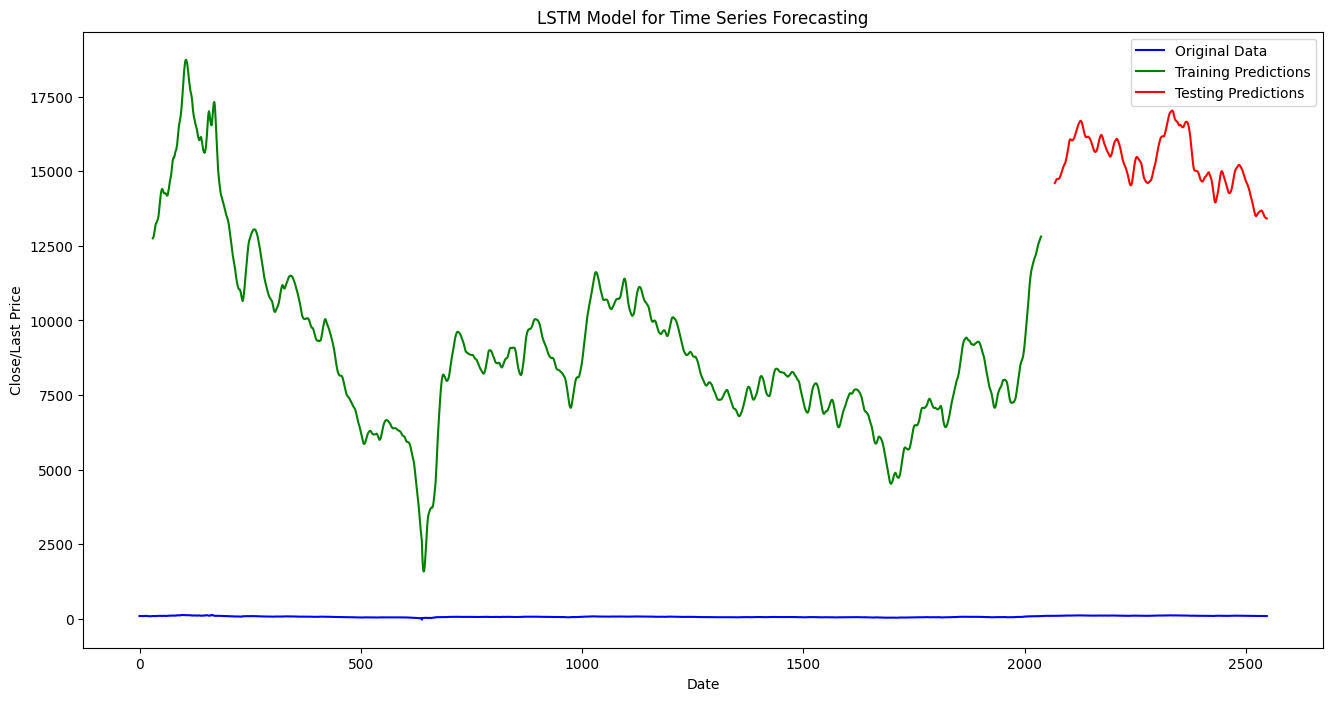

In [142]:
# Plotting the results
plt.figure(figsize=(16, 8))
plt.plot(df.index, data, label='Original Data', color='blue')
plt.plot(df.index[time_steps:len(train_predict)+time_steps], train_plot[time_steps:len(train_predict)+time_steps], label='Training Predictions', color='green')
plt.plot(df.index[len(train_predict)+(time_steps*2):len(scaled_data)], test_plot[len(train_predict)+(time_steps*2):len(scaled_data)], label='Testing Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('LSTM Model for Time Series Forecasting')
plt.legend()
plt.show()

In [143]:
data = pd.read_csv("Crude oil.csv")
data
## Cleaning up the data
data.columns=["Date",	"Price",'Volume','Open','High','Low']
data.head()
data['Date'] = pd.to_datetime(data['Date'])
data=data[["Date",	"Price"]]
data.head()
data.dropna()

Date  Price
0    2022-10-28  87.90
1    2022-10-27  88.26
2    2022-10-26  87.91
3    2022-10-25  85.32
4    2022-10-24  84.58
...         ...    ...
2543 2012-11-05  85.65
2544 2012-11-02  84.86
2545 2012-11-01  87.09
2546 2012-10-31  86.24
2547 2012-10-30  85.68

[2548 rows x 2 columns]

In [152]:
data.isnull().sum()

Date     0
Price    0
Days     0
Month    0
Year     0
dtype: int64

In [151]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Price'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [153]:
adfuller_test(data['Price'])

ADF Test Statistic : -1.6311397654314364
p-value : 0.46689417081931894
#Lags Used : 3
Number of Observations Used : 2544
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Differencing**

In [154]:
data['Price First Difference'] = data['Price'] - data['Price'].shift(60)

In [155]:
## Again test dickey fuller test
adfuller_test(data['Price First Difference'].dropna())

ADF Test Statistic : -5.535032474860812
p-value : 1.7525514204195237e-06
#Lags Used : 17
Number of Observations Used : 2470
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [156]:
data.dropna()

Date  Price  Days Month  Year  Price First Difference
60   2022-08-04  88.54  3565   Aug  2022                    0.64
61   2022-08-03  90.66  3564   Aug  2022                    2.40
62   2022-08-02  94.42  3563   Aug  2022                    6.51
63   2022-08-01  93.89  3562   Aug  2022                    8.57
64   2022-07-29  98.62  3559   Jul  2022                   14.04
...         ...    ...   ...   ...   ...                     ...
2543 2012-11-05  85.65     6   Nov  2012                  -10.79
2544 2012-11-02  84.86     3   Nov  2012                  -11.02
2545 2012-11-01  87.09     2   Nov  2012                   -8.86
2546 2012-10-31  86.24     1   Oct  2012                   -8.99
2547 2012-10-30  85.68     0   Oct  2012                  -10.56

[2488 rows x 6 columns]

In [157]:
data["Price First Difference"]=data["Price First Difference"].interpolate()

In [158]:
data=data.reset_index()

data.columns

Index(['index', 'Date', 'Price', 'Days', 'Month', 'Year',
       'Price First Difference'],
      dtype='object')

In [159]:
data=data.fillna(data.mean())
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [160]:
from statsmodels.formula.api import ols

In [161]:
data = data.drop('index', axis=1)
data['Month']=data.Date.dt.strftime("%b")
data['Year']=data.Date.dt.strftime("%Y")
data.columns=["Date",	"Price",'Price First Difference','Days','Month',"Year"]
data.head()

Date  Price  Price First Difference Days Month      Year
0 2022-10-28  87.90                    3650  Oct  2022  0.041568
1 2022-10-27  88.26                    3649  Oct  2022  0.041568
2 2022-10-26  87.91                    3648  Oct  2022  0.041568
3 2022-10-25  85.32                    3647  Oct  2022  0.041568
4 2022-10-24  84.58                    3646  Oct  2022  0.041568

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2548 non-null   datetime64[ns]
 1   Price                   2548 non-null   float64       
 2   Price First Difference  2548 non-null   int64         
 3   Days                    2548 non-null   object        
 4   Month                   2548 non-null   object        
 5   Year                    2548 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 119.6+ KB


In [163]:
data["t"]=np.arange(1,len(data)+1)
data["t_sqrd"]=np.square(data.t)
data["Log"]=np.log(data.Price)
MONTH=pd.get_dummies(data["Month"])
data

Date  Price  Price First Difference Days Month       Year     t  \
0    2022-10-28  87.90                    3650  Oct  2022   0.041568     1   
1    2022-10-27  88.26                    3649  Oct  2022   0.041568     2   
2    2022-10-26  87.91                    3648  Oct  2022   0.041568     3   
3    2022-10-25  85.32                    3647  Oct  2022   0.041568     4   
4    2022-10-24  84.58                    3646  Oct  2022   0.041568     5   
...         ...    ...                     ...  ...   ...        ...   ...   
2543 2012-11-05  85.65                       6  Nov  2012 -10.790000  2544   
2544 2012-11-02  84.86                       3  Nov  2012 -11.020000  2545   
2545 2012-11-01  87.09                       2  Nov  2012  -8.860000  2546   
2546 2012-10-31  86.24                       1  Oct  2012  -8.990000  2547   
2547 2012-10-30  85.68                       0  Oct  2012 -10.560000  2548   

       t_sqrd       Log  
0           1  4.476200  
1           4  4.480287  
2           9  4.476314  
3          16  4.446409  
4          25  4.437698  
...       ...       ...  
2543  6471936  4.450269  
2544  6477025  4.441003  
2545  6482116  4.466942  
2546  6487209  4.457134  
2547  6492304  4.450619  

[2548 rows x 9 columns]

In [166]:
MONTH = pd.DataFrame(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
MONTHS = MONTH

In [168]:
newdata=data.copy()
newdata=pd.concat([data,MONTHS],axis=1)
newdata.reset_index(drop=False,inplace=True)
newdata.shape

(2548, 22)

In [169]:
TRN=newdata.head(400)
TST=newdata.tail(69)

# **Exponential model**

In [170]:
exp=ols("Log~t",data=TRN).fit()
predexponential=pd.Series(exp.predict(pd.DataFrame(TST['t'])))
rmse_Exp=np.sqrt((np.mean(np.array(TST['Price'])-np.array(np.exp(predexponential)))**2))
rmse_Exp

85.08468369967765

In [171]:
predexponentialdf=pd.DataFrame(columns=['Price'],index=TST['Date'])
predexponentialdf['Price']=predexponential.values
predexponentialdf

Price
Date                
2013-02-01  1.635825
2013-01-31  1.634603
2013-01-30  1.633381
2013-01-29  1.632158
2013-01-28  1.630936
...              ...
2012-11-05  1.557601
2012-11-02  1.556379
2012-11-01  1.555157
2012-10-31  1.553935
2012-10-30  1.552712

[69 rows x 1 columns]

In [172]:
exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     545.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.47e-76
Time:                        17:20:04   Log-Likelihood:                 278.53
No. Observations:                 400   AIC:                            -553.1
Df Residuals:                     398   BIC:                            -545.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6670      0.012    385.280      0.000       4.643       4.691
t             -0.0012   5.24e-05    -23.346      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.394   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.210
Skew:                           0.204   Prob(JB):                        0.122
Kurtosis:                       2.706   Cond. No.                         464.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Quadratic model**

In [173]:
qdmodel=ols('Log~t+t_sqrd',data=TRN).fit()
predqd=pd.Series(qdmodel.predict(pd.DataFrame(TST[['t','t_sqrd']])))
rmse_Qd=np.sqrt((np.mean(np.array(TST['Price'])-np.array(predqd))**2))
rmse_Qd

116.16983145440734

In [174]:
predqddf=pd.DataFrame(columns=['Price'],index=TST['Date'])
predqddf['Price']=predqd.values
predqddf
qdmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     440.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.54e-101
Time:                        17:20:18   Log-Likelihood:                 339.88
No. Observations:                 400   AIC:                            -673.8
Df Residuals:                     397   BIC:                            -661.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5273      0.016    289.199      0.000       4.497       4.558
t              0.0009      0.000      4.782      0.000       0.001       0.001
t_sqrd     -5.198e-06   4.35e-07    -11.939      0.000   -6.05e-06   -4.34e-06
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.400
Skew:                           0.030   Prob(JB):                        0.819
Kurtosis:                       2.857   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Holt's Exponential Smoothing**

In [175]:
df = pd.read_csv("Crude oil.csv")
df.columns=["Date",	"Price",'Volume','Open','High','Low']
df['Date'] = pd.to_datetime(df['Date'])
df=data[["Date",	"Price"]]
df.head()
df.dropna()


Date  Price
0    2022-10-28  87.90
1    2022-10-27  88.26
2    2022-10-26  87.91
3    2022-10-25  85.32
4    2022-10-24  84.58
...         ...    ...
2543 2012-11-05  85.65
2544 2012-11-02  84.86
2545 2012-11-01  87.09
2546 2012-10-31  86.24
2547 2012-10-30  85.68

[2548 rows x 2 columns]

In [176]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt


In [177]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [178]:
# Fit the Holt-Winters model
model = ExponentialSmoothing(train['Price'], seasonal='add', seasonal_periods=12)
fit_model = model.fit()

In [179]:
# Make predictions on the test set
predictions = fit_model.forecast(len(test))

In [180]:
# Calculate RMSE
rmse_Holts = sqrt(mean_squared_error(test['Price'], predictions))
print(f'RMSE: {rmse_Holts}')

RMSE: 16.696001067609597


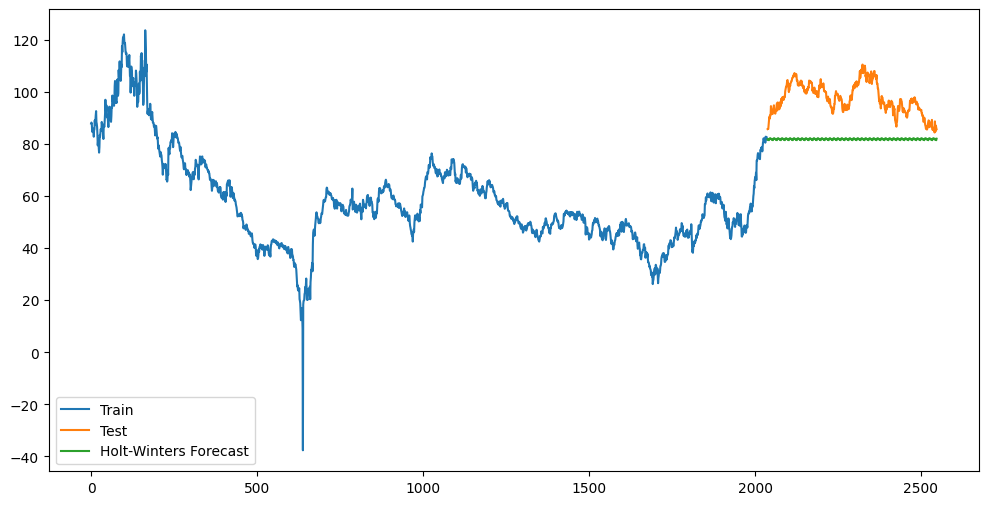

In [181]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(predictions, label='Holt-Winters Forecast')
plt.legend()
plt.show()

# Fitting of the model

In [184]:
# Tabulate RMSEs
df_rmse = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'Quadratic', 'Exponential', 'LSTM','Holt_Expo'],
    'RMSE': [rmse_Arima, rmse_Sarima_12, rmse_Qd, rmse_Exp, rmse_LSTM,rmse_Holts]
})
print(df_rmse)

         Model        RMSE
0        ARIMA   11.410135
1       SARIMA   47.089376
2    Quadratic  116.169831
3  Exponential   85.084684
4         LSTM   24.965893
5    Holt_Expo   16.696001


In [185]:
df_rmse = df_rmse.sort_values(by='RMSE', ascending=True).reset_index(drop=True)
print(df_rmse)

         Model        RMSE
0        ARIMA   11.410135
1    Holt_Expo   16.696001
2         LSTM   24.965893
3       SARIMA   47.089376
4  Exponential   85.084684
5    Quadratic  116.169831
